# Seed classification using SVM


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv('Datasets/seeds.csv')
df.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


<Axes: >

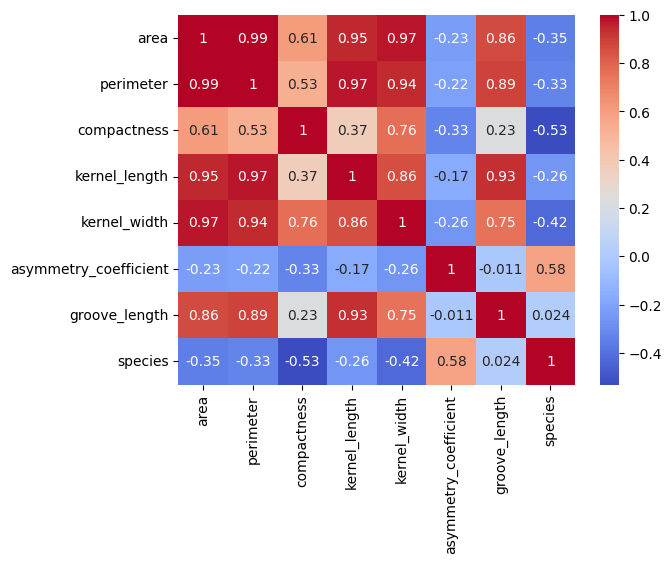

In [6]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [7]:
df.isna().any()

area                     False
perimeter                False
compactness              False
kernel_length            False
kernel_width             False
asymmetry_coefficient    False
groove_length            False
species                  False
dtype: bool

In [8]:
y = df.iloc[:,-1]
X = df[['groove_length','asymmetry_coefficient']]

In [9]:
encoder = StandardScaler()
X = encoder.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
cf = SVC(kernel='rbf')

In [26]:
cf.fit(X_train, y_train)

SVC()

In [27]:
y_pred = cf.predict(X_test)
accuracy = accuracy_score(y_pred,y_test)
accuracy*100

90.47619047619048